In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Lynn.csv
/kaggle/input/Boston.csv
/kaggle/input/Brockton.csv
/kaggle/input/Cambridge.csv
/kaggle/input/Springfield.csv


In [64]:

TARGET_FILES = [
    r"/kaggle/input/Boston.csv",
    r"/kaggle/input/Brockton.csv",
    r"/kaggle/input/Cambridge.csv",
    r"/kaggle/input/Springfield.csv"
]

In [65]:
city_infos = [{} for _ in TARGET_FILES]

for i in range(len(TARGET_FILES)):
    filename = TARGET_FILES[i]
    data = pd.read_csv(filename)
    data = data[data["Name"].notna()] # remove NaN name rows
    city_infos[i] = {
        "data": data,
        "filename": filename
    }

In [66]:
male = pd.DataFrame()
female = pd.DataFrame()

for city in city_infos:
    m = city['data'].groupby(['Gender']).get_group('male')
    f = city['data'].groupby(['Gender']).get_group('female')
    male = pd.concat([male, m])
    female = pd.concat([female, f])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [67]:
for i in range(len(male)):
    annual = male['Annual_Wage'].iloc[i]
    monthly = male['Monthly_Wage'].iloc[i]
    try:
        if type(annual) != 'int' or type(annual) != 'float':
            annual = annual.split(',')
            new_annual = ''
            for a in annual:
                new_annual += a
            male['Annual_Wage'].iloc[i] = float(new_annual)
    except:
        male['Annual_Wage'].iloc[i] = 0.
        
    try:
        if type(monthly) != 'int' or type(monthly) != 'float':
            monthly = monthly.split(',')
            new_monthly = ''
            for m in monthly:
                new_monthly += m
            male['Monthly_Wage'].iloc[i] = float(new_monthly)
    except:
        male['Annual_Wage'].iloc[i] = 0.
    
for i in range(len(female)):
    annual = female['Annual_Wage'].iloc[i]
    monthly = female['Monthly_Wage'].iloc[i]
    try:
        if type(annual) != 'int' or type(annual) != 'float':
            annual = annual.split(',')
            new_annual = ''
            for a in annual:
                new_annual += a
            female['Annual_Wage'].iloc[i] = float(new_annual)
    except:
        female['Annual_Wage'].iloc[i] = 0.
        
    try:
        if type(monthly) != 'int' or type(monthly) != 'float':
            monthly = monthly.split(',')
            new_monthly = ''
            for m in monthly:
                new_monthly += m
            female['Monthly_Wage'].iloc[i] = float(new_monthly)
    except:
        female['Annual_Wage'].iloc[i] = 0.

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



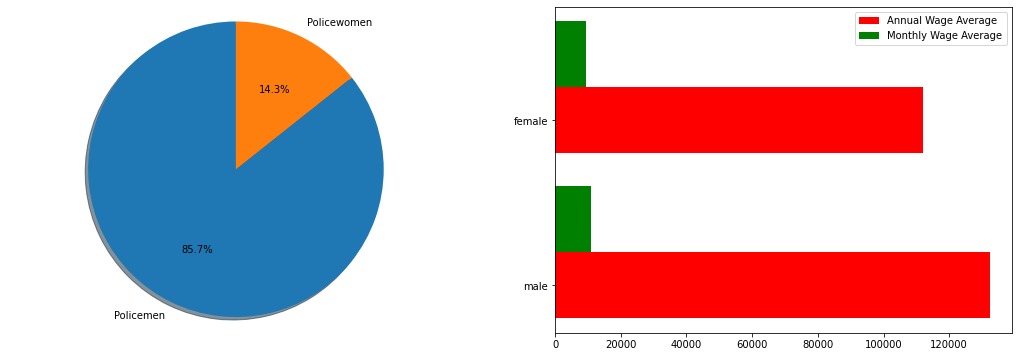

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
bars = ('male', 'female')
annual_averages = [male['Annual_Wage'].mean(), female['Annual_Wage'].mean()]
monthly_averages = [male['Monthly_Wage'].mean(), female['Monthly_Wage'].mean()]
width = 0.4

y_pos = np.arange(len(bars))
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(122)
ax1.barh(y_pos, annual_averages, width, color='red', label='Annual Wage Average')
ax1.barh(y_pos + width, monthly_averages, width, color='green', label='Monthly Wage Average')

# ax.set(yticks=y_pos + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
plt.yticks(y_pos, bars)
ax1.legend()

ax2 = fig.add_subplot(121)
labels = 'Policemen', 'Policewomen'
sizes = [male.shape[0]/(male.shape[0]+female.shape[0]), female.shape[0]/(male.shape[0]+female.shape[0])]
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')
plt.show()

In [69]:
for i in range(male.shape[0]):
    if male['Annual_Wage'].iloc[i] != 0.:
        male['Annual_Wage'].iloc[i] = np.log(male['Annual_Wage'].iloc[i])
    else:
        male['Annual_Wage'].iloc[i] = 0.
        
for i in range(female.shape[0]):
    if female['Annual_Wage'].iloc[i] != 0.:
        female['Annual_Wage'].iloc[i] = np.log(female['Annual_Wage'].iloc[i])
    else:
        female['Annual_Wage'].iloc[i] = 0.

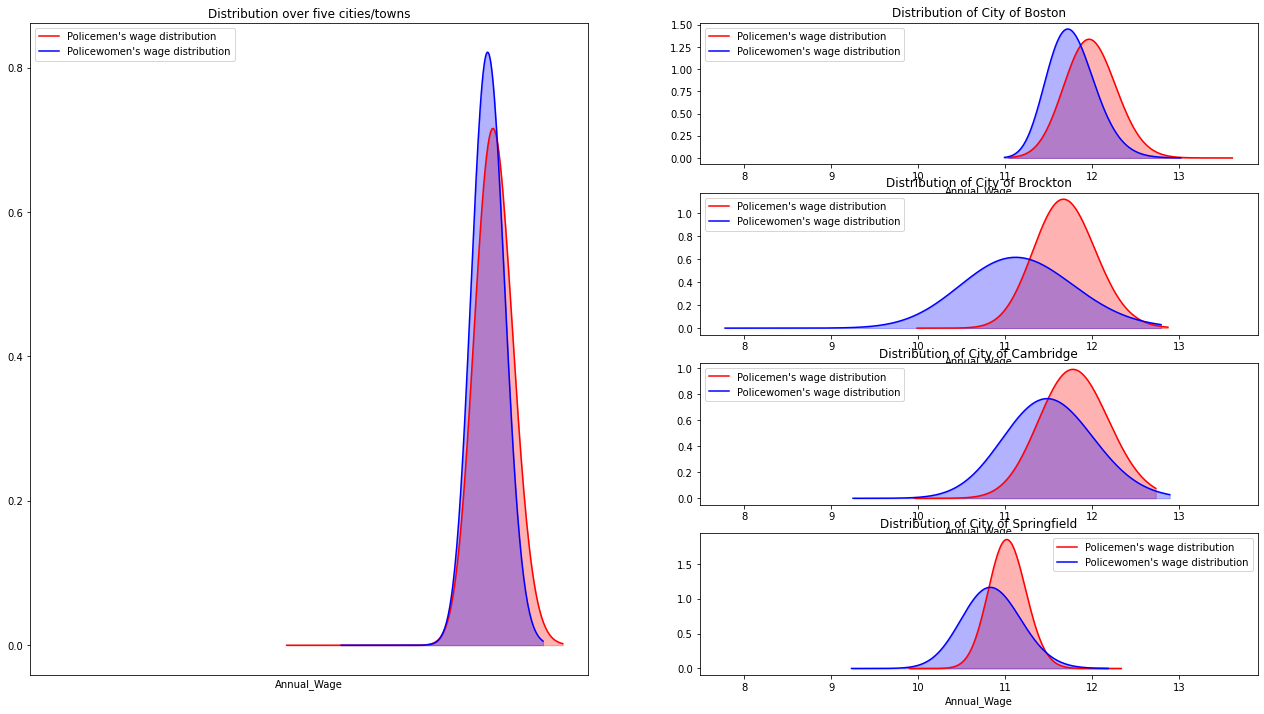

In [70]:
fig = plt.figure(figsize=(22,12))

ax1 = fig.add_subplot(121, sharex=ax2)
ax1 = sns.distplot(male['Annual_Wage'], fit_kws={"color":"red"}, kde=False,
        fit=stats.gamma, hist=None, label="Policemen's wage distribution")
ax1 = sns.distplot(female['Annual_Wage'], fit_kws={"color":"blue"}, kde=False,
        fit=stats.gamma, hist=None, label="Policewomen's wage distribution")
ax1.legend()
l1 = ax1.lines[0]
l2 = ax1.lines[1]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax1.fill_between(x1,y1, color="red", alpha=0.3)
ax1.fill_between(x2,y2, color="blue", alpha=0.3)
plt.title('Distribution over five cities/towns')

ax2 = fig.add_subplot(422)
ax2 = sns.distplot(male.groupby('Employer').get_group('City of Boston')['Annual_Wage'], fit_kws={"color":"red"}, kde=False,
        fit=stats.gamma, hist=None, label="Policemen's wage distribution")
ax2 = sns.distplot(female.groupby('Employer').get_group('City of Boston')['Annual_Wage'], fit_kws={"color":"blue"}, kde=False,
        fit=stats.gamma, hist=None, label="Policewomen's wage distribution")
ax2.legend()
l1 = ax2.lines[0]
l2 = ax2.lines[1]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax2.fill_between(x1,y1, color="red", alpha=0.3)
ax2.fill_between(x2,y2, color="blue", alpha=0.3)
plt.title('Distribution of City of Boston')

ax3 = fig.add_subplot(424, sharex=ax2)
ax3 = sns.distplot(male.groupby('Employer').get_group('City of Brockton')['Annual_Wage'], fit_kws={"color":"red"}, kde=False,
        fit=stats.gamma, hist=None, label="Policemen's wage distribution")
ax3 = sns.distplot(female.groupby('Employer').get_group('City of Brockton')['Annual_Wage'], fit_kws={"color":"blue"}, kde=False,
        fit=stats.gamma, hist=None, label="Policewomen's wage distribution")
ax3.legend()
l1 = ax3.lines[0]
l2 = ax3.lines[1]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax3.fill_between(x1,y1, color="red", alpha=0.3)
ax3.fill_between(x2,y2, color="blue", alpha=0.3)
plt.title('Distribution of City of Brockton')

ax4 = fig.add_subplot(426, sharex=ax2)
ax4 = sns.distplot(male.groupby('Employer').get_group('City of Cambridge')['Annual_Wage'], fit_kws={"color":"red"}, kde=False,
        fit=stats.gamma, hist=None, label="Policemen's wage distribution")
ax4 = sns.distplot(female.groupby('Employer').get_group('City of Cambridge')['Annual_Wage'], fit_kws={"color":"blue"}, kde=False,
        fit=stats.gamma, hist=None, label="Policewomen's wage distribution")
ax4.legend()
l1 = ax4.lines[0]
l2 = ax4.lines[1]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax4.fill_between(x1,y1, color="red", alpha=0.3)
ax4.fill_between(x2,y2, color="blue", alpha=0.3)
plt.title('Distribution of City of Cambridge')

ax5 = fig.add_subplot(428, sharex=ax2)
ax5 = sns.distplot(male.groupby('Employer').get_group('City of Springfield')['Annual_Wage'], fit_kws={"color":"red"}, kde=False,
        fit=stats.gamma, hist=None, label="Policemen's wage distribution")
ax5 = sns.distplot(female.groupby('Employer').get_group('City of Springfield')['Annual_Wage'], fit_kws={"color":"blue"}, kde=False,
        fit=stats.gamma, hist=None, label="Policewomen's wage distribution")
ax5.legend()
l1 = ax5.lines[0]
l2 = ax5.lines[1]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax5.fill_between(x1,y1, color="red", alpha=0.3)
ax5.fill_between(x2,y2, color="blue", alpha=0.3)
plt.title('Distribution of City of Springfield')

plt.show()

In [71]:
_all = pd.DataFrame()

for city in city_infos:
    _all = pd.concat([_all, city['data']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [84]:
_all['Race Ethnicity'].loc[_all['Race Ethnicity'] == 'W_NL'] = 'White'
_all['Race Ethnicity'].loc[_all['Race Ethnicity'] == 'B_NL'] = 'Black'
_all['Race Ethnicity'].loc[_all['Race Ethnicity'] == 'HL'] = 'Hispanic/Latin'
_all['Race Ethnicity'].loc[_all['Race Ethnicity'] == 'A'] = 'Asian'

In [72]:
for i in range(len(_all)):
    annual = _all['Annual_Wage'].iloc[i]
    monthly = _all['Monthly_Wage'].iloc[i]
    try:
        if type(annual) != 'int' or type(annual) != 'float':
            annual = annual.split(',')
            new_annual = ''
            for a in annual:
                new_annual += a
            _all['Annual_Wage'].iloc[i] = float(new_annual)
    except:
        _all['Annual_Wage'].iloc[i] = 0.
        
    try:
        if type(monthly) != 'int' or type(monthly) != 'float':
            monthly = monthly.split(',')
            new_monthly = ''
            for m in monthly:
                new_monthly += m
            _all['Monthly_Wage'].iloc[i] = float(new_monthly)
    except:
        _all['Annual_Wage'].iloc[i] = 0.

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
for i in range(_all.shape[0]):
    try:
        if 'Serg' in _all['Job_Title'].iloc[i] or 'Sergeant' in _all['Job_Title'].iloc[i]:
            _all['Job_Title'].iloc[i] = 'Sergeant'
        elif 'Chief' in _all['Job_Title'].iloc[i] or 'Director' in _all['Job_Title'].iloc[i] or 'Commissioner' in _all['Job_Title'].iloc[i]:
            _all['Job_Title'].iloc[i] = 'Chief'
        elif 'Lieut' in _all['Job_Title'].iloc[i] or 'Lieutenant' in _all['Job_Title'].iloc[i]:
            _all['Job_Title'].iloc[i] = 'Lieutenant'
        elif 'Capt' in _all['Job_Title'].iloc[i] or 'Captain' in _all['Job_Title'].iloc[i]:
            _all['Job_Title'].iloc[i] = 'Captain'
        elif 'Detective' in _all['Job_Title'].iloc[i]:
            _all['Job_Title'].iloc[i] = 'Detective'
        else:
            _all['Job_Title'].iloc[i] = 'Officer'
    except:
        _all['Job_Title'].iloc[i] = 'Officer'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal



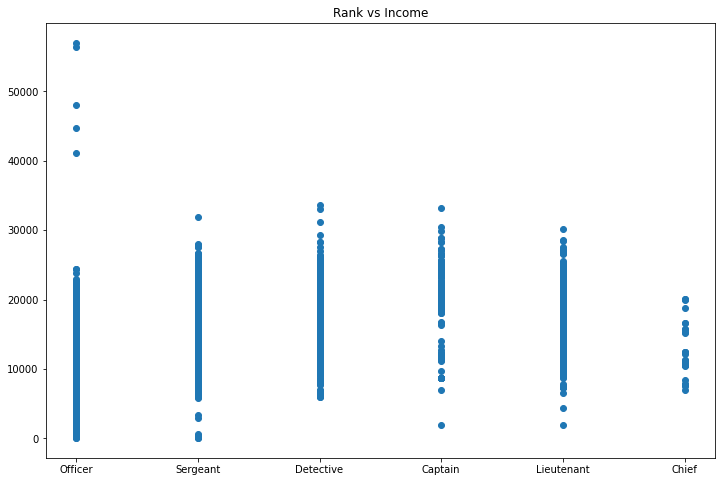

In [74]:
from scipy.interpolate import interp1d
import statsmodels.api as sm

ranks = ['Officer', 'Sergeant', 'Detective', 'Captain', 'Lieutenant', 'Chief']
x_pos = np.arange(float(len(ranks)))

fig = plt.figure(figsize=(12, 8))
plt.xticks(x_pos, ranks)
ax = fig.add_subplot(111)

# titles = pd.concat(male, female)
x = _all['Job_Title'].apply(lambda x: ['Officer', 'Sergeant', 'Detective', 'Captain', 'Lieutenant', 'Chief'].index(x))
y = _all['Monthly_Wage']

lowess = sm.nonparametric.lowess(y, x, frac=.3)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

f = interp1d(lowess_x, lowess_y, bounds_error=False)

xnew = [i/1. for i in range(10)]
ynew = f(xnew)

plt.plot(x, y, 'o')
plt.title('Rank vs Income')
plt.plot(xnew, ynew, '-')
plt.show()

In [85]:
salary2015 = _all.groupby("Year").get_group(2015.0)
salary2016 = _all.groupby("Year").get_group(2016.0)
salary2017 = _all.groupby("Year").get_group(2017.0)
salary2018 = _all.groupby("Year").get_group(2018.0)

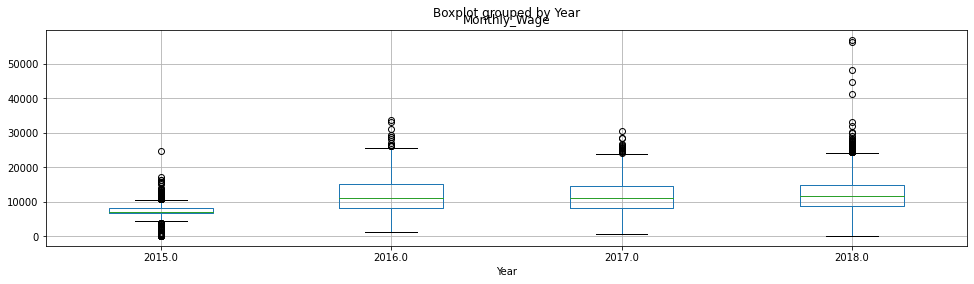

In [76]:
_all.boxplot(by='Year', column='Monthly_Wage', grid=True, figsize=(16, 4))

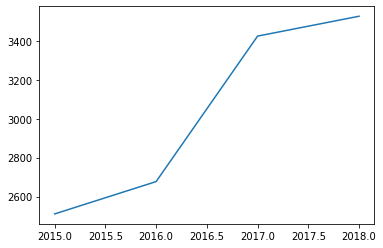

In [77]:
x = [2015, 2016, 2017, 2018]
y = [salary2015.shape[0], salary2016.shape[0], salary2017.shape[0], salary2018.shape[0]]

plt.plot(x, y, '-')
plt.show()

In [78]:
import plotly
# import plotly.plotly as py

def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [ ]:
fig = genSankey(tmp,cat_cols=['Gender', 'Range', 'Number'],value_cols='Number',title='Genders vs Salary Levels')
plotly.offline.plot(fig, validate=False)

In [87]:
_all

,Annual_Wage,Employer,Gender,Job_Title,Monthly_Wage,Name,Race Ethnicity,Year,_type
0,125979,City Of Boston,male,Lieutenant,10498,William Slavin J,White,2015.0,GovsalariesItem
1,122231,City Of Boston,male,Lieutenant,10186,Kenneth Macmaster A,White,2015.0,GovsalariesItem
2,117584,City Of Boston,male,Sergeant,9799,Joseph Maguire M,White,2015.0,GovsalariesItem
3,115466,City Of Boston,male,Lieutenant,9622,Charles Kelly G,White,2015.0,GovsalariesItem
4,114487,City Of Boston,male,Lieutenant,9541,Richard Driscoll J,White,2015.0,GovsalariesItem
...,...,...,...,...,...,...,...,...,...
2203,28852,City Of Springfield,male,Officer,2404,Josh Wood R,White,2018.0,NaN
2204,26833,City Of Springfield,male,Officer,2236,Nathan Jurkowski M,White,2018.0,NaN
2205,16383,City Of Springfield,female,Officer,1365,Emily Williams E,Black,2018.0,NaN
2206,6553,City Of Springfield,male,Officer,546,Brandon Chabot P,White,2018.0,NaN


In [86]:
m1 = _all.groupby(['Gender', 'Race Ethnicity']).get_group(('male', 'White'))
m2 = _all.groupby(['Gender', 'Race Ethnicity']).get_group(('male', 'Black'))
m3 = _all.groupby(['Gender', 'Race Ethnicity']).get_group(('male', 'Hispanic/Latin'))
m4 = _all.groupby(['Gender', 'Race Ethnicity']).get_group(('male', 'Asian'))
f1 = _all.groupby(['Gender', 'Race Ethnicity']).get_group(('female', 'White'))
f2 = _all.groupby(['Gender', 'Race Ethnicity']).get_group(('female', 'Black'))
f3 = _all.groupby(['Gender', 'Race Ethnicity']).get_group(('female', 'Hispanic/Latin'))
f4 = _all.groupby(['Gender', 'Race Ethnicity']).get_group(('female', 'Asian'))

array(['White', 'Black', 'Hispanic/Latin', 'Asian'], dtype=object)

In [ ]:
tmp = pd.DataFrame({'Gender': ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female'], 
                    'Race': ['White', 'Black', 'Hispanic/Latin', 'Asian', 'White', 'Black', 'Hispanic/Latin', 'Asian'],
                    'Number': [m1.shape[0], m2.shape[0], m3.shape[0], m4.shape[0], f1.shape[0], f2.shape[0], f3.shape[0], f4.shape[0]]
                   })

In [ ]:
fig = genSankey(tmp,cat_cols=['Gender', 'Race', 'Number'],value_cols='Number',title='Genders vs Ethnics')
plotly.offline.plot(fig, validate=False)